<a href="https://colab.research.google.com/github/preetikhullbe/Online-retail-customer-segmentatiion/blob/main/Online_retail_customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Online retail customer segmentation



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual

# **Understanding Customer Segmentation**
Customer segmentation is the process of separating customers into groups on the basis of their shared behavior or other attributes. The groups should be homogeneous within themselves and should also be heterogeneous to each other. The overall aim of this process is to identify high-value customer base i.e. customers that have the highest growth potential or are the most profitable.

Insights from customer segmentation are used to develop tailor-made marketing campaigns and for designing overall marketing strategy and planning.



# **Why segment your customers?**
customer segmentation has a lot of potential benefits. It helps a company to develop an effective strategy for targeting its customers. This has a direct impact on the entire product development cycle, the budget management practices, and the plan for delivering targeted promotional content to customers. For example, a company can make a high-end product, a budget product, or a cheap alternative product, depending upon whether the product is intended for its most high yield customers, frequent purchasers or for the low-value customer segment. It may also fine-tune the features of the product for fulfilling the specific needs of its customers.

Customer segmentation can also help a company to understand how its customers are alike, what is important to them, and what is not. Often such information can be used to develop personalized relevant content for different customer bases. Many studies have found that customers appreciate such individual attention and are more likely to respond and buy the product. They also come to respect the brand and feel connected with it. This is likely to give the company a big advantage over its competitors. In a world where everyone has hundreds of emails, push notifications, messages, and ads dropping into their content stream, no one has time for irrelevant content.

Finally, this technique can also be used by companies to test the pricing of their different products, improve customer service, and upsell and cross-sell other products or services

# **GitHub Link -**

https://github.com/preetikhullbe/Online-retail-customer-segmentatiion

# **Problem Statement**



In this project, task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers

# **How to segment your customers?**
To start with customer segmentation, a company needs to have a clear vision and a goal in mind. The following steps can be undertaken to find segments in the customer base on a broad level.

**Analyze the existing customer pool**: Understanding the geographical distribution, customer preferences/beliefs, reviewing website search page analytics, etc.

**Develop an understanding of each customer**: Mapping each customer to a set of preferences to understand and predict their behavior: the products, services, and content they would be interested in.

**Define segment opportunities**: Once the segments have been defined, there should a proper business understanding of each segment and its challenges and opportunities. The entire company’s marketing strategy can be branched out to cater to different niches of customers.

**Research the segment**: After cementing the definition and business relevance of different customer segments, a company needs to understand how to modify its products or services to better cater to them. For example, it may decide to provide higher discounts to some customers compared to others to expand its active customer base.

**Tweak strategy**: Experiment with new strategies and understand the impact of time and economy on the purchasing behavior of customers in different segments. And then the process should be repeated for refining the strategy as much as possible.

# **Let's Begin !**

In the following analysis, I am going to use the Online Retail Data Set. The data contains information about transnational transactions for a UK-based and registered non-store online retail.
Our goal in this Notebook is to cluster our customers to get insights in:

Increasing revenue (Knowing customers who present most of our revenue)

**Increasing customer retention**

**Discovering Trends and patterns**

**Defining customers at risk**

## **1. Know Your Data**


### <b>Attribute Information: </b>

* ### **InvoiceNo**: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### **StockCode**: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### **Description**: Product (item) name. Nominal.
* ### **Quantity**: The quantities of each product (item) per transaction. Numeric.
* ### **InvoiceDate**: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### **UnitPrice**: Unit price. Numeric, Product price per unit in sterling.
* ### **CustomerID**: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### **Country**: Country name. Nominal, the name of the country where each customer resides.

### Importing some important Libraries

In [6]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore')
from numpy import math

In [7]:
#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset Loading

In [8]:
# Load Dataset
# read Excel file with Panda Dataframe
cust_seg_df=pd.read_excel("/content/drive/MyDrive/Online Retail.xlsx") 

### Dataset First View

In [9]:
# Dataset First Look
# first 10 rows and columns of data set
cust_seg_df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [10]:
# last 5 rows and columns of data set
cust_seg_df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


### Dataset Rows & Columns count

In [11]:
# Dataset Rows & Columns count
# Shape of Data set in the form of rows and columns
cust_seg_df.shape

(541909, 8)

we have 541909 records for 8 columns.

### Dataset Information

In [12]:
# # Check Information of data set
cust_seg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [13]:
# Check Description of data set
cust_seg_df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


# **Unique value**

In [14]:
# Let's Check Number of Unique values for each column
for col in ["InvoiceNo","StockCode","InvoiceDate","CustomerID", "Country"]:
    print("Unique Values for ", col, " - ", cust_seg_df[col].nunique())

Unique Values for  InvoiceNo  -  25900
Unique Values for  StockCode  -  4070
Unique Values for  InvoiceDate  -  23260
Unique Values for  CustomerID  -  4372
Unique Values for  Country  -  38


## **Duplicate Values**

In [15]:
# Check duplicate values Present in data set
len(cust_seg_df[cust_seg_df.duplicated()])

5268

In [16]:
print("Shape before dropping duplicates", cust_seg_df.shape)
cust_seg_df = cust_seg_df.drop_duplicates()
print("Shape after dropping duplicates", cust_seg_df.shape)

Shape before dropping duplicates (541909, 8)
Shape after dropping duplicates (536641, 8)


## **Missing Values/Null Values**

In [17]:
# Missing Values/Null Values Count
cust_seg_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [18]:
# Missing Value Count Function
def show_missing():
    missing = cust_seg_df.columns[cust_seg_df.isnull().any()].tolist()
    return missing

# Missing data counts and percentage
print('Missing Data Count')
print(cust_seg_df[show_missing()].isnull().sum().sort_values(ascending = False))
print('----'*25)
print('Missing Data Percentage')
print(round(cust_seg_df[show_missing()].isnull().sum().sort_values(ascending = False)/len(cust_seg_df)*100,2))

Missing Data Count
CustomerID     135037
Description      1454
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
CustomerID     25.16
Description     0.27
dtype: float64


##From above we can see that Description 0.27% and Customer Id have 25.16% null values


Text(0.5, 1.0, ' Visulaizing Missing Values')

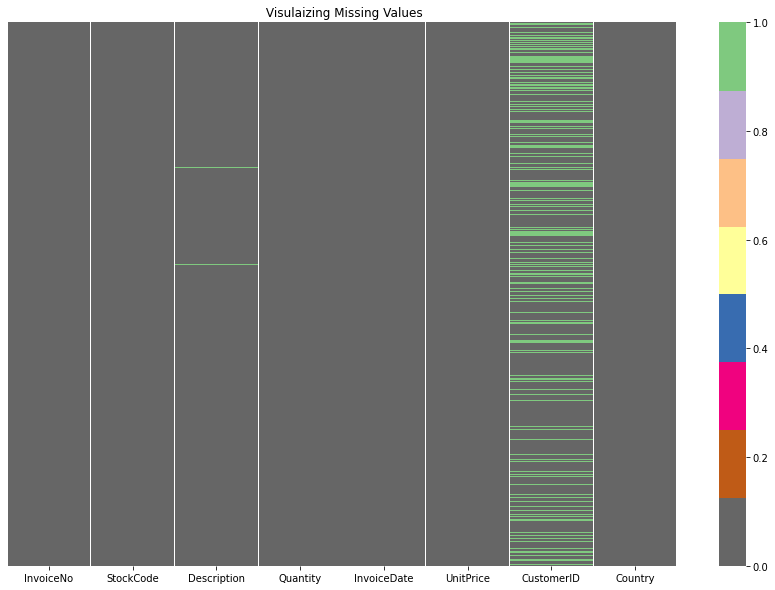

In [19]:
# Visualizing the missing valuesprint
plt.figure(figsize=(15,10))
sns.heatmap(cust_seg_df.isnull(),cmap='Accent_r',annot=False,yticklabels=False)
plt.title(" Visulaizing Missing Values")

## Check if InvoiceNo for Null Customer ID exist in cases where Customer ID is present for filling CustomerID Nulls

In [20]:
null_id_invoices = cust_seg_df[cust_seg_df.CustomerID.isnull()]["InvoiceNo"].drop_duplicates().tolist()
print("Invoices count with Null Customer ID", len(null_id_invoices))
### Check if InvoiceNo in Null CustomerID dataframe exist in Non-Null Customer ID Dataframe
cust_seg_df[~cust_seg_df.CustomerID.isnull()][cust_seg_df.InvoiceNo.isin(null_id_invoices)]

Invoices count with Null Customer ID 3710


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


No such cases present as empty dataframe is returned

## **Filling NaN values in CustomersID**

In [21]:
#filling null values in CustomersID using 'pad' method
cust_seg_df['CustomerID'].fillna(method ='pad',inplace=True)         #pad: propagate last valid observation forward to next valid

In [22]:
# Changing the datatype of Customer Id as per Business understanding
cust_seg_df['CustomerID'] = cust_seg_df['CustomerID'].astype(str)

## now Dropping null values from the Description column ,cause we have only 0.27% missing values.

In [23]:
#dropping null values from the DF
cust_seg_df.dropna(inplace=True)
cust_seg_df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [24]:
#checking dataset info
cust_seg_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 535187 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    535187 non-null  object        
 1   StockCode    535187 non-null  object        
 2   Description  535187 non-null  object        
 3   Quantity     535187 non-null  int64         
 4   InvoiceDate  535187 non-null  datetime64[ns]
 5   UnitPrice    535187 non-null  float64       
 6   CustomerID   535187 non-null  object        
 7   Country      535187 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 36.7+ MB


In [25]:
#DF's shape after dropping null values
cust_seg_df.shape

(535187, 8)

In [26]:
# Let's check Description of data set with another way
cust_seg_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,535187.0,9.671593,219.059056,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,535187.0,4.645242,97.364810,-11062.06,1.25,2.08,4.13,38970.0


## Here we can see that min values for Quantity and unitprice column are negative.UnitPrice can't be negative ,min unitprice could be 0
## Need to Explore these columns

## **Analysis of UnitPrice variable**

In [27]:
print("Minimum UnitPrice", min(cust_seg_df["UnitPrice"]))
print("Maximum UnitPrice", max(cust_seg_df["UnitPrice"]))
cust_seg_df["UnitPrice"].describe()

Minimum UnitPrice -11062.06
Maximum UnitPrice 38970.0


count    535187.000000
mean          4.645242
std          97.364810
min      -11062.060000
25%           1.250000
50%           2.080000
75%           4.130000
max       38970.000000
Name: UnitPrice, dtype: float64

**checking cases where Price <0**

In [28]:
cust_seg_df[cust_seg_df.UnitPrice<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,17516.0,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,17516.0,United Kingdom


**Removing these two cases from the UnitPrice coumn**

In [29]:
cust_seg_df = cust_seg_df[cust_seg_df.UnitPrice >= 0]

**Checking All rows, where UnitPrice is equal to 0**

In [30]:
print("% of data with Price = 0: ", round(len(cust_seg_df[cust_seg_df.UnitPrice == 0]) * 100 / len(cust_seg_df),2),"%" )
print("Count of unique Customer ID values ", cust_seg_df[cust_seg_df.UnitPrice == 0].CustomerID.nunique(), "\n")
cust_seg_df[cust_seg_df.UnitPrice == 0][~cust_seg_df.CustomerID.isnull()].head()

% of data with Price = 0:  0.2 %
Count of unique Customer ID values  361 



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
6391,536941,22734,amazon,20,2010-12-03 12:08:00,0.0,14680.0,United Kingdom
6392,536942,22139,amazon,15,2010-12-03 12:08:00,0.0,14680.0,United Kingdom
7313,537032,21275,?,-30,2010-12-03 16:50:00,0.0,16455.0,United Kingdom
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647.0,Germany
13217,537425,84968F,check,-20,2010-12-06 15:35:00,0.0,15602.0,United Kingdom


In [31]:
#Dropping Cases with UnitPrice = 0
cust_seg_df = cust_seg_df[cust_seg_df.UnitPrice >0]
cust_seg_df["UnitPrice"].describe()

count    534129.000000
mean          4.695864
std          95.079189
min           0.001000
25%           1.250000
50%           2.100000
75%           4.130000
max       38970.000000
Name: UnitPrice, dtype: float64

In [32]:
print("Minimum Quantity", min(cust_seg_df["Quantity"]))
print("Maximum Quantity", max(cust_seg_df["Quantity"]))
cust_seg_df["Quantity"].describe()

Minimum Quantity -80995
Maximum Quantity 80995


count    534129.000000
mean          9.916818
std         216.452113
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

In [33]:
# Let's check dataframe have negative values in quantity

cust_seg_df[cust_seg_df['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


here we can see the all the rows where value is negative for Quantity columnn ,InvoiceNo contain "C" .which means Cancellation.

In [34]:
# Changing the datatype to str
cust_seg_df['InvoiceNo'] = cust_seg_df['InvoiceNo'].astype('str')

In [35]:
# String to be searched in start of string 
search ="C"

  
# Boolean series returned with False at place of NaN
bool_series = cust_seg_df["InvoiceNo"].str.startswith(search, na=False)

  
# Displaying filtered dataframe
cancel_order = cust_seg_df[bool_series]

cancel_order.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [36]:
print(cancel_order['InvoiceNo'].count()*100/cust_seg_df['InvoiceNo'].count())

1.7319786044195316


**Now, Here we See that Invoice number starting with C has negative values and as per description of the data those are cancelations. so This shows that quantity is negative when any order was cancelled. Removed cancellations data since they only make upto ~2% of data.**

In [37]:
#Finding in which countries cancellation is high
#grouping with invoice no 
cancel_order_country = cancel_order.groupby('Country')['InvoiceNo'].count().reset_index()
cancel_order_country_top10 = cancel_order_country.sort_values('InvoiceNo',ascending=False, ignore_index=True).head(10)
cancel_order_country_top10

,Country,InvoiceNo
0,United Kingdom,7821
1,Germany,453
2,EIRE,301
3,France,148
4,USA,112
5,Australia,74
6,Spain,48
7,Italy,45
8,Belgium,38
9,Japan,37


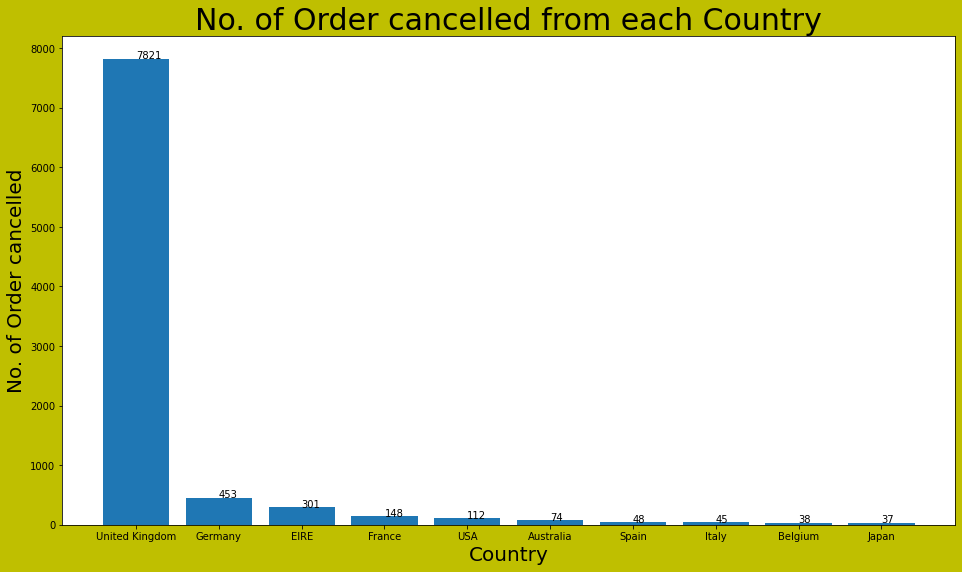

In [38]:
#figure size
plt.figure(figsize=(16,9),facecolor="y")

## Define x and y axis
x=cancel_order_country_top10['Country']
y=cancel_order_country_top10['InvoiceNo']

# Creating the bar plot
plt.bar(x,y)

## Function to set label
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

addlabels(x,y)

# set xlabel. ylabel and title
plt.xlabel("Country", size=20)
plt.ylabel("No. of Order cancelled", size=20)
plt.title("No. of Order cancelled from each Country", size=30)

## Showing the plot
plt.show()

In [39]:
# Also If Invoice No starts with C means it's a cancellation. We need to drop this entries.
cust_seg_df=cust_seg_df[~cust_seg_df['InvoiceNo'].str.contains('C')]

In [40]:
# Let's  Check how many values are left where unitprice==0after dropping out the canceled orders
len(cust_seg_df[cust_seg_df['UnitPrice']==0])

0

**So we don't have any rows left where UnitPrice=0**

In [41]:
#let's recheck the description of numeri columns
cust_seg_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,524878.0,10.616600,156.280031,1.000,1.00,4.00,11.00,80995.00
UnitPrice,524878.0,3.922573,36.093028,0.001,1.25,2.08,4.13,13541.33


In [42]:
#checking shape of dataframe after doing all the cleaning
cust_seg_df.shape

(524878, 8)

## **Feature Engineering**

In [43]:
#printing values for a particular InvoiceDate
print(cust_seg_df[cust_seg_df['InvoiceDate']=='12/13/10 9:02'].index.values)

[26732 26733 26734 26735 26736 26737 26738 26739 26740 26741 26742 26743
 26744 26745 26746 26747 26748]


So for one InvoiceDate we have multiple values so for differentiate these values ,we will convert invoice date into day,month,year,hour and minutes.

In [44]:
# Converting Invoice Date to datetime. 
# Invoice Date is in format of 01-12-2010 08:26.
cust_seg_df["InvoiceDate"] = pd.to_datetime(cust_seg_df["InvoiceDate"], format="%m-%d-%Y %H:%M")

In [45]:
cust_seg_df["year"] = cust_seg_df["InvoiceDate"].apply(lambda x: x.year)
cust_seg_df["month_num"] = cust_seg_df["InvoiceDate"].apply(lambda x: x.month)
cust_seg_df["day_num"] = cust_seg_df["InvoiceDate"].apply(lambda x: x.day)
cust_seg_df["hour"] = cust_seg_df["InvoiceDate"].apply(lambda x: x.hour)
cust_seg_df["minute"] = cust_seg_df["InvoiceDate"].apply(lambda x: x.minute)

In [46]:
# Extracting month from the Invoice date
cust_seg_df['Month']=cust_seg_df['InvoiceDate'].dt.month_name()

In [47]:
# Extracting day from the Invoice date
cust_seg_df['Day']=cust_seg_df['InvoiceDate'].dt.day_name()

In [48]:
#how many years are there
cust_seg_df.year.unique()

array([2010, 2011])

so we have two years data (2010,2011)

In [49]:
#first 5 records 
cust_seg_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month_num,day_num,hour,minute,Month,Day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday


### **Calculate total transaction amount**
Compute the total value of transaction based on quantity sold and per unit price.

In [50]:
# New feature : Amount
#we know that amount=Quantity*Unit price
cust_seg_df['Amount'] = cust_seg_df['Quantity']*cust_seg_df['UnitPrice']
rfm_m = cust_seg_df.groupby('CustomerID')['Amount'].sum()
rfm_m = rfm_m.reset_index()
rfm_m.head()

,CustomerID,Amount
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,3366.27
3,12349.0,1757.55
4,12350.0,334.40


# **Exploratory Data Analysis**

## **1.Top 10 ordering countries**


In [121]:
# value count of countries 
cust_seg_df.Country.value_counts().head(10)

United Kingdom    479985
Germany             9025
France              8392
EIRE                7879
Spain               2479
Netherlands         2359
Belgium             2031
Switzerland         1958
Portugal            1492
Australia           1181
Name: Country, dtype: int64

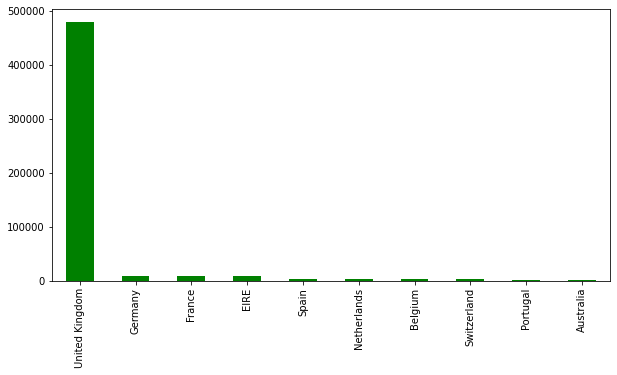

In [71]:
#plotting bar graph 
cust_seg_df.Country.value_counts().head(10).plot.bar(figsize=(10,5),color='g')

### **Majority of customers resides in United Kingdom and After UK ,most customers are from Germany**

## **finding at which time, the sales are high**

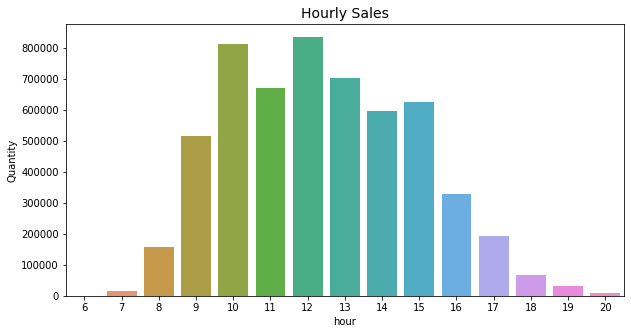

In [74]:
hourly_sales = cust_seg_df[['hour', 'Quantity']].groupby('hour').sum()
#hourly_sales.plot(kind='bar')
plt.figure(figsize=(10,5))
plt.title("Hourly Sales", fontsize=14)
sns.barplot(hourly_sales.index, hourly_sales['Quantity'])

### **The majority of the sales happens in between 10am to 3pm.**

## **On which day, the sales are high**

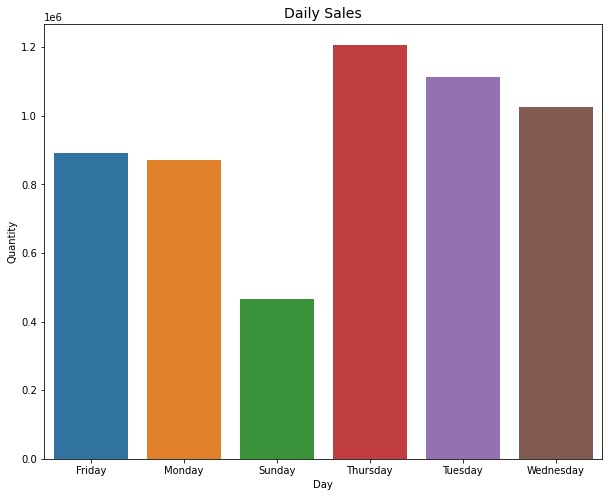

In [76]:
daily_sales = cust_seg_df[['Day', 'Quantity']].groupby('Day').sum()
plt.figure(figsize=(10,8))
plt.title("Daily Sales", fontsize=14)
sns.barplot(daily_sales.index, daily_sales['Quantity'])

### **Sales On Thursdays are high and least on sunday**

## **on which day number, the sales are high**

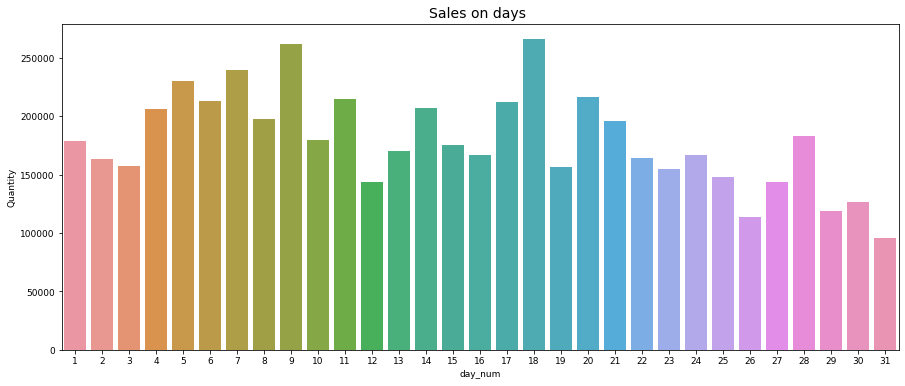

In [123]:
day_sales = cust_seg_df[['day_num', 'Quantity']].groupby('day_num').sum()
plt.figure(figsize=(15,6))
plt.title("Sales on days ", fontsize=14)
sns.barplot(day_sales.index, day_sales['Quantity'])

### **Sales on day 18 is the highest and on 31 is the lowest.**

## **Monthly sales**

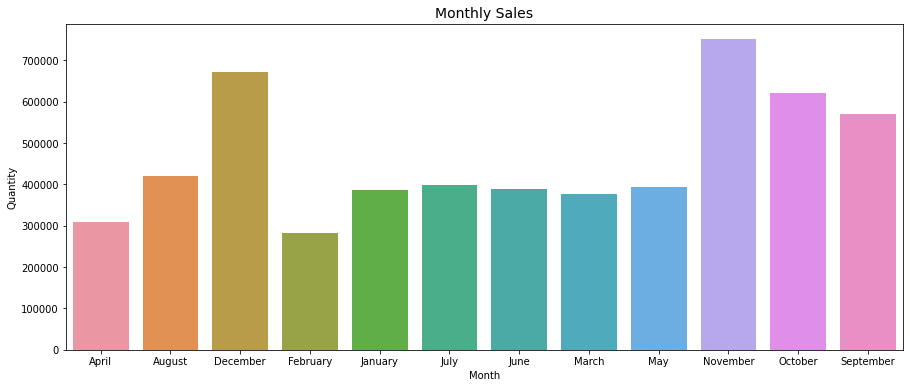

In [80]:
monthly_sales = cust_seg_df[['Month', 'Quantity']].groupby('Month').sum()
plt.figure(figsize=(15,6))
plt.title("Monthly Sales", fontsize=14)
sns.barplot(monthly_sales.index, monthly_sales['Quantity'])

### **Most of the sales happened in November,December and September month (Christmas festive sales) and February Month had least sales**

## **Top product based on description**

In [91]:
# Let's check Top 5 products using value_counts on Description feature
top_5_product=cust_seg_df['Description'].value_counts().reset_index().rename(columns={'index':'Product_name','Description':'Count'})
top_5_product.head()

,Product_name,Count
0,WHITE HANGING HEART T-LIGHT HOLDER,2311
1,JUMBO BAG RED RETROSPOT,2109
2,REGENCY CAKESTAND 3 TIER,2007
3,PARTY BUNTING,1699
4,LUNCH BAG RED RETROSPOT,1581


In [110]:
# Let's check bottom 5 products
top_5_product.tail(5)

,Product_name,Count
4021,GLASS BEAD HOOP NECKLACE BLACK,1
4022,HOT WATER BOTTLE BABUSHKA LARGE,1
4023,BIRTHDAY BANNER TAPE,1
4024,"GARLAND, MAGIC GARDEN 1.8M",1
4025,"PAPER CRAFT , LITTLE BIRDIE",1


Text(0.5, 1.0, 'Top 5 products')

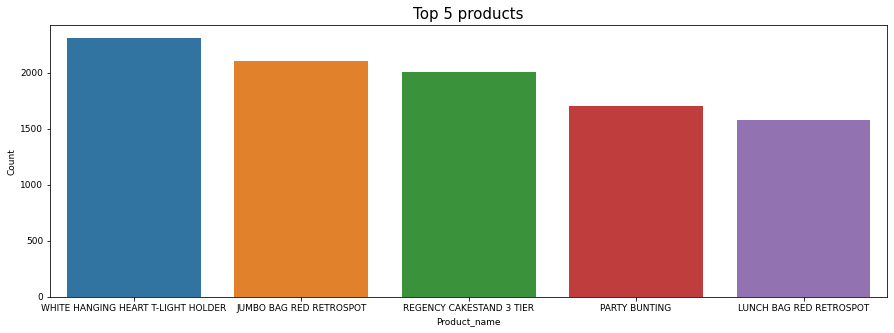

In [98]:
# Now, plotting Top 5 product in terms of description
plt.figure(figsize=(15,5))
plt.rcParams['font.size'] = '9'
sns.barplot(x=top_5_product['Product_name'].head(),y=top_5_product['Count'])
plt.title('Top 5 products',fontsize='15')

### **so the most selling product is WHITE "HANGING HEART T-LIGHT HOLDER"**

## **least selling Five products**

Text(0.5, 1.0, 'bottom 5 products')

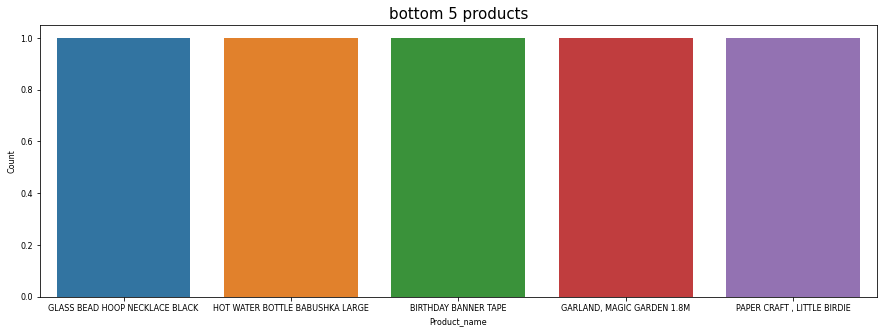

In [109]:
# five bottom product in terms of description
plt.figure(figsize=(15,5))
plt.rcParams['font.size'] = '8'
sns.barplot(x=top_5_product['Product_name'].tail(),y=top_5_product['Count'])
plt.title('bottom 5 products',fontsize='15')

following products are the least selling

1.Green with Metal Bag Charm

2.White with Metal Bag Charm

3.Blue/Net Shell Necklace W Pendant

4.Pink Easter Hens+ Flower

5.Paper Craft, Little Birdie

## **Top five itmes in terms of STOCK CODE**

In [111]:
#get top 5 stock code
top_5_StockCodes=cust_seg_df['StockCode'].value_counts().reset_index().rename(columns={'index':'StockCode','StockCode':'Count'}).head(5)
top_5_StockCodes

,StockCode,Count
0,85123A,2253
1,85099B,2109
2,22423,2007
3,47566,1699
4,20725,1582


Text(0.5, 1.0, 'Top 5 products in terms of Stock Code')

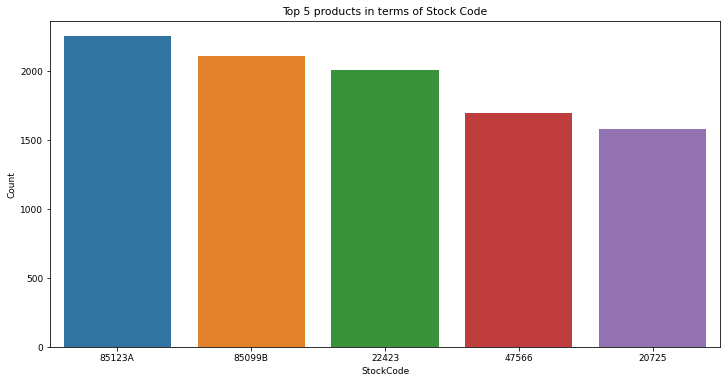

In [112]:
# Top 5 product in terms of Stcok Code
plt.figure(figsize=(12,6))
plt.rcParams['font.size'] = '9'
sns.barplot(x=top_5_StockCodes['StockCode'],y=top_5_StockCodes['Count'])
plt.title('Top 5 products in terms of Stock Code')

## **Top Ten customer who are more frequent**

In [113]:
top_10_customers=cust_seg_df['CustomerID'].value_counts().reset_index().rename(columns={'index':'CustomerID','CustomerID':'Products_purchasing_Count'}).head(10)
top_10_customers

,CustomerID,Products_purchasing_Count
0,17841.0,8306
1,14911.0,7399
2,12748.0,5882
3,14096.0,5394
4,14606.0,3843
5,14156.0,2794
6,15311.0,2765
7,13089.0,2632
8,14646.0,2369
9,16705.0,2191


Text(0.5, 1.0, 'Top 10 frequent Customers.')

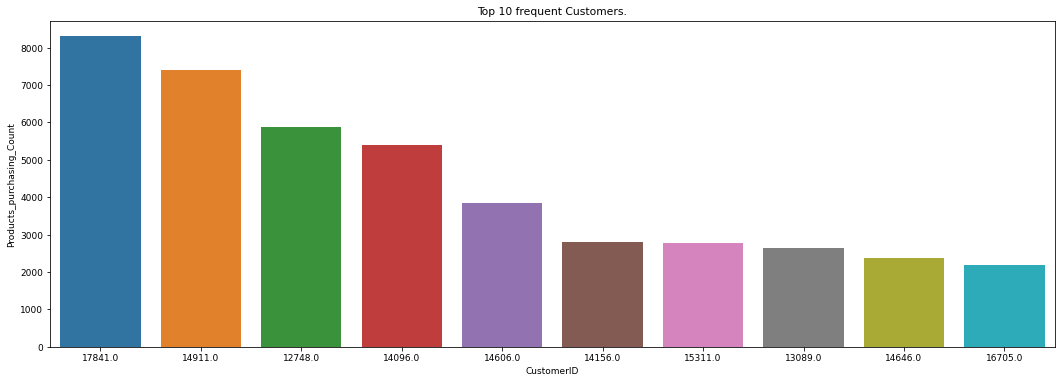

In [114]:
# Top Ten frequent Customers
plt.figure(figsize=(18,6))
plt.rcParams['font.size'] = '9'
sns.barplot(x=top_10_customers['CustomerID'],y=top_10_customers['Products_purchasing_Count'].head(10))
plt.title('Top 10 frequent Customers.')

### **CustomerID- 17841 had purchased highest number of products and CustomerID-14911 is the 2nd higest customer who purchased the most the products.**

## **Average amount spent by customers**

In [119]:
avg_amount=cust_seg_df.groupby('CustomerID')['Amount'].mean().reset_index().rename(columns={'Amount':'Avg_amount_per_customer'}).sort_values('Avg_amount_per_customer',ascending=False)
avg_amount.head()

,CustomerID,Avg_amount_per_customer
0,12346.0,77183.60
3012,16446.0,56157.50
2014,15098.0,13305.50
2506,15749.0,4453.43
3732,17448.0,4287.63


Text(0.5, 1.0, 'Average amount spent by each Customer')

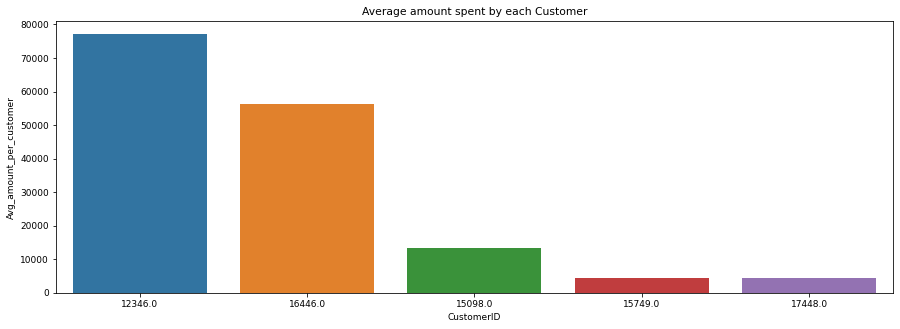

In [120]:
# Sales count on different days.
plt.figure(figsize=(15,5))
sns.barplot(x=avg_amount['CustomerID'].head(5),y=avg_amount['Avg_amount_per_customer'].head(5))
plt.title('Average amount spent by each Customer')

### **Customer ID 12346 spent 77183 Average amount which is is highest.**

In [81]:
cust_seg_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month_num,day_num,hour,minute,Month,Day,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,20.34


# **Data Preparation**

## We are going to analysis the Customers based on below 3 factors:

## **R (Recency)**: Number of days since last purchase

## **F (Frequency)**: Number of transactions

## **M (Monetary):** Total Amount of transactions (revenue contributed)
## **We will do RFM Analysis as a first step and then combine RFM with predictive algorithms (k-means).**

## **RFM Analysis answers these questions:**

## Who are our best customers?
## Who has the potential to be converted in more profitable customers?
## Which customers we must retain?
## Which group of customers is most likely to respond to our current campaign?

In [52]:
# New feature : Frequency
rfm_f = cust_seg_df.groupby('CustomerID')['InvoiceNo'].count()
rfm_f = rfm_f.reset_index()
rfm_f.columns = ['CustomerID', 'Frequency']
rfm_f.head()

,CustomerID,Frequency
0,12346.0,1
1,12347.0,182
2,12348.0,206
3,12349.0,73
4,12350.0,17


In [53]:
# Merging the two dfs
rfm = pd.merge(rfm_m, rfm_f, on='CustomerID', how='inner')   
#inner: use intersection of keys from both frames, similar to a SQL innerjoin; preserve the order of the left keys
rfm.head(10)

,CustomerID,Amount,Frequency
0,12346.0,77183.60,1
1,12347.0,4310.00,182
2,12348.0,3366.27,206
3,12349.0,1757.55,73
4,12350.0,334.40,17
5,12352.0,4240.56,245
6,12353.0,89.00,4
7,12354.0,1079.40,58
8,12355.0,459.40,13
9,12356.0,2811.43,59


# **Conclusion**